In [16]:
import numpy as np
import plotly.graph_objects as go


def find_peaks_with_gap(signal, period):
    '''
    Given entire time series and a period candidate, find all peaks
    abs_pos: returns absolute position in time series if true, else relative position in segment
    '''
    idx_list = []
    slices = int(len(signal) / period)
    for i in range(slices):
        start = i * period
        end = start + period
        segment = signal[start:end]
        maxima_pos = np.argmax(segment)
        idx_list.append(start + maxima_pos)
    return np.array(idx_list)

def find_period(signal, d_min, d_max):
    '''
    Assumes all time series has fixed period `d`
    Returns: period length
    '''
    score_dict = dict()
    # for distance d
    for d in range(d_min, d_max):
        print(d)
        # find peaks
        p = find_peaks_with_gap(signal, d)
        # find valleys
        v = find_peaks_with_gap(signal * -1, d)
        # calculate score
        pd = [p[i + 1] - p[i] for i in range(len(p) - 1)]
        vd = [v[i + 1] - v[i] for i in range(len(v) - 1)]
        s = np.min([np.std(pd), np.std(vd)]) / np.sqrt(d)
        score_dict[d] = s
    # return d with lowest variance
    return min(score_dict, key=score_dict.get)


def get_best_period(signal, drange):
    '''
    Assumes all time series has fixed period `d`
    Returns: period length
    '''
    score_dict = dict()
    # for distance d
    for d in drange:
        print(d)
        # find peaks
        p = find_peaks_with_gap(signal, d)
        # find valleys
        v = find_peaks_with_gap(signal * -1, d)
        # calculate score
        pd = [p[i + 1] - p[i] for i in range(len(p) - 1)]
        vd = [v[i + 1] - v[i] for i in range(len(v) - 1)]
        s = np.min([np.std(pd), np.std(vd)]) / np.sqrt(d)
        score_dict[d] = s
    # return d with lowest variance
    return min(score_dict, key=score_dict.get)

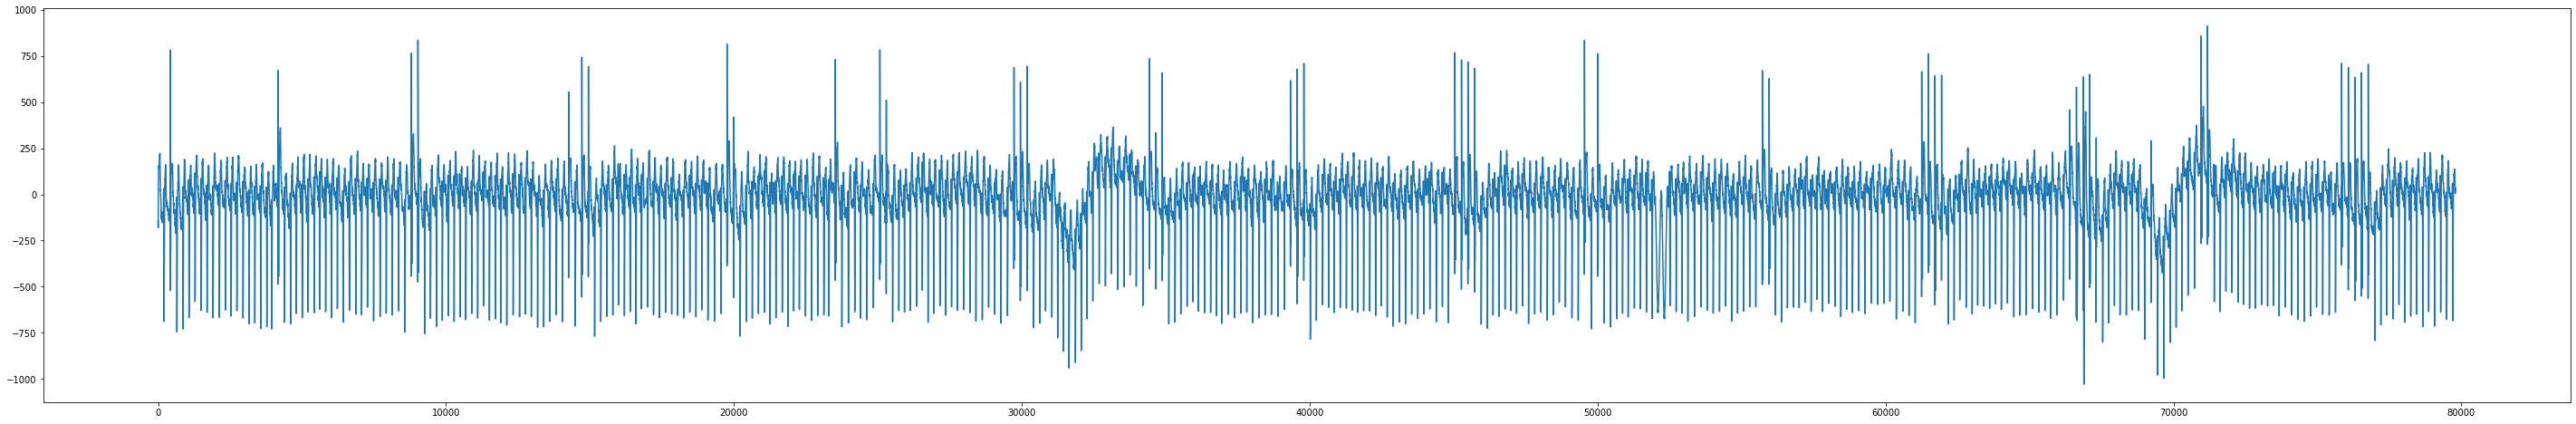

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

BASE_PATH = '../data-sets/KDD-Cup/data/'
df = pd.read_csv(BASE_PATH + '001_UCR_Anomaly_35000.txt', names=['values'])

plt.figure(figsize=[50, 8])
plt.plot(df['values'])
